In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', 500)

import warnings
warnings.filterwarnings("ignore")


In [3]:
train = pd.read_csv('data/train_transaction.csv')
test = pd.read_csv('data/test_transaction.csv')
train_id = pd.read_csv('data/train_identity.csv')
test_id = pd.read_csv('data/test_identity.csv')

In [3]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

## Data Minification

In [ ]:
def reduce_mem_usage1(props):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in props.columns:
        if props[col].dtype != object:  # Exclude strings
            
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",props[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(props[col]).all(): 
                NAlist.append(col)
                props[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = props[col].fillna(0).astype(np.int64)
            result = (props[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True


            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        props[col] = props[col].astype(np.uint8)
                    elif mx < 65535:
                        props[col] = props[col].astype(np.uint16)
                    elif mx < 4294967295:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)    
            
            # Make float datatypes 32 bit
            else:
                props[col] = props[col].astype(np.float32)
            
            # Print new column type
            print("dtype after: ",props[col].dtype)
            print("******************************")
    
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist

## Time is important?

[第四届魔镜杯大赛](https://ai.ppdai.com/mirror/goToMirrorDetail?mirrorId=17&tabindex=1)

赛题是要预测同一批用户不同时刻是否违约，还是不同用户的违约模型？即，时间是否是个重要特征？这对后面的特征工程有着很大的影响。

这里简单将 `M`（信用卡匹配信息）、`card`（支付卡相关信息）和 `P_emaildomain`（买方邮件域）特征相同的认为是同一个用户。

In [41]:
columns = ['M'+ str(i) for i in range(1,10)]+['card'+ str(i) for i in range(1,7)]+['P_emaildomain']
# identity = pd.concat([train[columns],test[columns]]).drop_duplicates()

identity = test[columns].drop_duplicates()
identity['identity_id'] = list(range(len(identity)))

In [78]:
all_data = pd.concat([train.drop('isFraud', axis=1), test])
all_data = all_data.merge(identity, on=columns, how='left')
all_data = all_data[~pd.isnull(all_data['identity_id'])]

In [79]:
all_data = all_data.groupby('identity_id')['TransactionDT'].agg(['max','min','count']).reset_index()
all_data = all_data.sort_values('min',ascending=True).reset_index(drop=True)

In [80]:
all_data['percent'] = 1/len(all_data)
all_data['percent'] = all_data['percent'].cumsum()

In [87]:
all_data[all_data['min']>max(train['TransactionDT'])].shape[0]/all_data.shape[0]

0.6229906923024662

可以看出 62% 的用户只出现在测试集。The challenge in this competition is building a model that can predict unseen clients (not unseen time).

## Fraudulent Clients 定义

> The logic of our labeling is define reported chargeback on the card as fraud transaction (isFraud=1) and transactions posterior to it with either user account, email address or billing address directly linked to these attributes as fraud too. If none of above is reported and found beyond 120 days, then we define as legit transaction (isFraud=0).

### Investigate "D" features

`D1-D15`: timedelta, such as days between previous transaction, etc.

In [95]:
# card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.
# 简单认为相同的 card 信息是同一用户

columns = ['card1', 'card2', 'card3', 'card4', 'card5', 'card6']
grouped = train.groupby(columns, as_index=False)['TransactionID'].count()

In [101]:
grouped[grouped['TransactionID']==7].tail(5)

,card1,card2,card3,card4,card5,card6,TransactionID
13534,18202,399.0,150.0,american express,236.0,credit,7
13546,18220,399.0,150.0,american express,213.0,credit,7
13588,18271,399.0,150.0,american express,185.0,credit,7
13626,18314,399.0,150.0,american express,150.0,credit,7
13682,18383,128.0,150.0,visa,226.0,credit,7


In [97]:
card1 = 18383
card2 = 128
card3 = 150
card4 = 'visa'
card5 = 226
card6 = 'credit'

train_slice = train[(train['card1']==card1)&
                   (train['card2']==card2)&
                   (train['card3']==card3)&
                   (train['card4']==card4)&
                   (train['card5']==card5)&
                   (train['card6']==card6)]

In [98]:
features = ['TransactionID','TransactionDT','ProductCD', 'P_emaildomain', 'R_emaildomain'
            , 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15']
train_slice = train_slice.sort_values(['TransactionID'])[features]
train_slice

,TransactionID,TransactionDT,ProductCD,P_emaildomain,R_emaildomain,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15
77340,3064340,1699373,W,gmail.com,NaN,405.0,405.0,21.0,405.0,21.0,NaN,NaN,NaN,NaN,441.0,NaN,NaN,NaN,NaN,405.0
90370,3077370,1887400,R,anonymous.com,anonymous.com,371.0,371.0,371.0,0.0,NaN,371.0,371.0,NaN,NaN,371.0,NaN,NaN,NaN,0.0,NaN
162642,3149642,3444196,W,gmail.com,NaN,425.0,425.0,20.0,425.0,20.0,NaN,NaN,NaN,NaN,461.0,NaN,NaN,NaN,NaN,425.0
232040,3219040,5504516,W,gmail.com,NaN,449.0,449.0,24.0,449.0,24.0,NaN,NaN,NaN,NaN,485.0,NaN,NaN,NaN,NaN,449.0
336013,3323013,8275288,W,gmail.com,NaN,481.0,481.0,32.0,481.0,32.0,NaN,NaN,NaN,NaN,517.0,0.0,NaN,NaN,NaN,481.0
425671,3412671,10772608,W,gmail.com,NaN,510.0,510.0,29.0,510.0,29.0,NaN,NaN,NaN,NaN,546.0,0.0,NaN,NaN,NaN,510.0
511094,3498094,13378525,W,gmail.com,NaN,540.0,540.0,30.0,540.0,30.0,NaN,NaN,NaN,NaN,576.0,59.0,NaN,NaN,NaN,540.0


In [102]:
# get a number of days from a starting point

train_slice['DaysFromStart'] = np.round(train_slice['TransactionDT']/(60*60*24),0)

In [103]:
train_slice

,TransactionID,TransactionDT,ProductCD,P_emaildomain,R_emaildomain,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,DaysFromStart
77340,3064340,1699373,W,gmail.com,NaN,405.0,405.0,21.0,405.0,21.0,NaN,NaN,NaN,NaN,441.0,NaN,NaN,NaN,NaN,405.0,20.0
90370,3077370,1887400,R,anonymous.com,anonymous.com,371.0,371.0,371.0,0.0,NaN,371.0,371.0,NaN,NaN,371.0,NaN,NaN,NaN,0.0,NaN,22.0
162642,3149642,3444196,W,gmail.com,NaN,425.0,425.0,20.0,425.0,20.0,NaN,NaN,NaN,NaN,461.0,NaN,NaN,NaN,NaN,425.0,40.0
232040,3219040,5504516,W,gmail.com,NaN,449.0,449.0,24.0,449.0,24.0,NaN,NaN,NaN,NaN,485.0,NaN,NaN,NaN,NaN,449.0,64.0
336013,3323013,8275288,W,gmail.com,NaN,481.0,481.0,32.0,481.0,32.0,NaN,NaN,NaN,NaN,517.0,0.0,NaN,NaN,NaN,481.0,96.0
425671,3412671,10772608,W,gmail.com,NaN,510.0,510.0,29.0,510.0,29.0,NaN,NaN,NaN,NaN,546.0,0.0,NaN,NaN,NaN,510.0,125.0
511094,3498094,13378525,W,gmail.com,NaN,540.0,540.0,30.0,540.0,30.0,NaN,NaN,NaN,NaN,576.0,59.0,NaN,NaN,NaN,540.0,155.0


In [104]:
train_slice['DaysFromPreviousTransaction'] = train_slice['DaysFromStart'].diff()

In [106]:
features = ['TransactionID', 'TransactionDT', 'D1', 'D2', 'D3', 'DaysFromStart', 'DaysFromPreviousTransaction']
train_slice[features].iloc[3:]

,TransactionID,TransactionDT,D1,D2,D3,DaysFromStart,DaysFromPreviousTransaction
232040,3219040,5504516,449.0,449.0,24.0,64.0,24.0
336013,3323013,8275288,481.0,481.0,32.0,96.0,32.0
425671,3412671,10772608,510.0,510.0,29.0,125.0,29.0
511094,3498094,13378525,540.0,540.0,30.0,155.0,30.0


可以看到：`D3=DaysFromPreviousTransaction`，因此 `D3` 是距离上次交易的时间间隔。对于 `D1` 是递增的，且可以看到 481 = 449 + 32， 510 = 481 + 29, 因此 `D1` 可能是距离第一次交易的时间间隔。`D2` 和 `D1` 相等，除了第一次交易 `D1` 为0时，`D2` 是 `NAN`。

In [122]:
train[(train['D1']==0)&(train['D3']>0)].shape[0]/train.shape[0]

0.0021776678971788532

当然也有例外，但是数量很少，只有 3% 不到。

### How to find UID - (Unique Identification)

因为`Time is important?`部分知道，测试集中有60%以上未出现在训练集中，但是使用信用卡信息并不能真正的确定是同一个UID，因为存在不少一对多的情形。但数据集共有430列，但是哪些列可以确定UID？通过`对抗验证`可以大量减少手工活。

#### 对抗验证--adversarial validation

1. 合并训练集和测试集，并且将训练集和测试集的标签分别设置为0和1；
2. 构建一个分类器，用于学习the different between testing and training data；
3. 找到训练集中与测试集最相似的样本（most resemble data），作为验证集，其余的作为训练集；【也可将概率作为样本的权重，做有权重的交叉验证】
4. 观察AUC，理想的状况是在0.5左右。

In [147]:
from xgboost import XGBClassifier
import catboost as cbt
from sklearn.preprocessing import LabelEncoder

In [283]:
train = pd.read_csv('data/train_transaction.csv')
test = pd.read_csv('data/test_transaction.csv')

In [290]:
# 对
for i in ['D' + str(i) for i in range(1,16)]:
    train[i] = np.floor(train.TransactionDT / (24*60*60)) - train[i]
    test[i] = np.floor(test.TransactionDT / (24*60*60)) - test[i]

In [291]:
features = ['TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain',
       'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
       'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4',
       'M5', 'M6', 'M7', 'M8', 'M9']
all_data = pd.concat([train[features].sample(frac=0.1),
           test[features].sample(frac=0.1)])
all_data['is_this_transaction_in_test_data'] = [0]*train.sample(frac=0.1).shape[0] + [1]*test.sample(frac=0.1).shape[0]


In [292]:
cat_col = all_data.select_dtypes(object).columns
for i in cat_col:
    lbl = LabelEncoder()
    all_data[i] = lbl.fit_transform(all_data[i].astype(str))

In [293]:
cat_list = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 
            'P_emaildomain', 'ProductCD', 'R_emaildomain', 'card4', 'card6']
cbt_model = cbt.CatBoostClassifier(iterations=1000,learning_rate=0.1,verbose=100,eval_metric='AUC'
#                                    ,cat_features=cat_list
#                                    ,task_type='GPU'
                                  )
cbt_model.fit(all_data.drop(['is_this_transaction_in_test_data'],axis=1),all_data['is_this_transaction_in_test_data'])


0:	total: 62.7ms	remaining: 1m 2s
100:	total: 3.7s	remaining: 32.9s
200:	total: 6.74s	remaining: 26.8s
300:	total: 9.69s	remaining: 22.5s
400:	total: 12.7s	remaining: 18.9s
500:	total: 15.7s	remaining: 15.6s
600:	total: 18.7s	remaining: 12.4s
700:	total: 21.7s	remaining: 9.26s
800:	total: 24.7s	remaining: 6.14s
900:	total: 27.7s	remaining: 3.05s
999:	total: 30.7s	remaining: 0us


In [294]:
from sklearn.metrics import roc_auc_score
y_test = cbt_model.predict(all_data.drop(['is_this_transaction_in_test_data'],axis=1))
roc_auc_score(y_test, all_data['is_this_transaction_in_test_data'])

0.996639466758294

<BarContainer object of 50 artists>

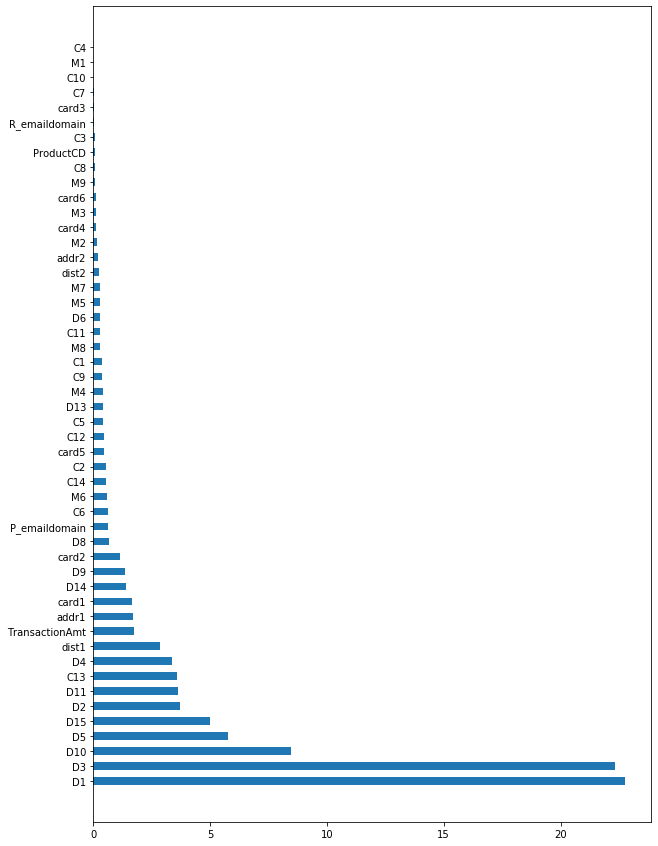

In [298]:
feature = pd.DataFrame({'importance':cbt_model.feature_importances_, 'feature':cbt_model.feature_names_})
feature = feature.sort_values('importance',ascending=False)
feature = feature[feature['importance']!=0]
plt.figure(figsize=(10, 15))
plt.barh(feature['feature'],feature['importance'],height =0.5)

使用 `card1`, `addr1` 和 `D1` 作为 `UID` 识别。

In [299]:
features = ['card1', 'addr1', 'D1']
all_data = pd.concat([train[features].sample(frac=0.1),
           test[features].sample(frac=0.1)])
all_data['is_this_transaction_in_test_data'] = [0]*train.sample(frac=0.1).shape[0] + [1]*test.sample(frac=0.1).shape[0]

cat_col = all_data.select_dtypes(object).columns
for i in cat_col:
    lbl = LabelEncoder()
    all_data[i] = lbl.fit_transform(all_data[i].astype(str))

cat_list = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 
            'P_emaildomain', 'ProductCD', 'R_emaildomain', 'card4', 'card6']
cbt_model = cbt.CatBoostClassifier(iterations=1000,learning_rate=0.1,verbose=100,eval_metric='AUC')
cbt_model.fit(all_data.drop(['is_this_transaction_in_test_data'],axis=1),all_data['is_this_transaction_in_test_data'])

y_test = cbt_model.predict(all_data.drop(['is_this_transaction_in_test_data'],axis=1))
roc_auc_score(y_test, all_data['is_this_transaction_in_test_data'])


0:	total: 30.2ms	remaining: 30.2s
100:	total: 2.29s	remaining: 20.3s
200:	total: 4.42s	remaining: 17.6s
300:	total: 6.52s	remaining: 15.1s
400:	total: 8.61s	remaining: 12.9s
500:	total: 10.7s	remaining: 10.6s
600:	total: 12.8s	remaining: 8.5s
700:	total: 14.9s	remaining: 6.35s
800:	total: 17s	remaining: 4.21s
900:	total: 19.1s	remaining: 2.1s
999:	total: 21.1s	remaining: 0us


0.90223049623829

In [301]:
train = pd.read_csv('data/train_transaction.csv')
test = pd.read_csv('data/test_transaction.csv')
train['D1n'] = np.floor(train.TransactionDT / (24*60*60)) - train.D1
train['uid'] = train.card1.astype(str)+'_'+train.addr1.astype(str)+'_'+train.D1n.astype(str)


使用 `card1`, `addr1` 和 `D1` 来定义 UID。

In [109]:
train['Transaction_Day'] = np.round(train['TransactionDT']/(60*60*24),0)
train['D1n'] = train['Transaction_Day'] - train['D1']


In [120]:
fetures = ['TransactionID','isFraud','TransactionAmt','card1','addr1','D1n','dist1','P_emaildomain','Transaction_Day']
train[(train['D1n']==-80)&(train['card1']==15775)][fetures]


,TransactionID,isFraud,TransactionAmt,card1,addr1,D1n,dist1,P_emaildomain,Transaction_Day
1694,2988694,1,240.0,15775,251.0,-80.0,NaN,yahoo.com,2.0
10046,2997046,1,260.0,15775,251.0,-80.0,NaN,yahoo.com,4.0
34029,3021029,1,250.0,15775,251.0,-80.0,NaN,yahoo.com,10.0
36812,3023812,1,315.0,15775,251.0,-80.0,NaN,yahoo.com,11.0
40459,3027459,1,390.0,15775,251.0,-80.0,NaN,yahoo.com,12.0
44717,3031717,1,445.0,15775,251.0,-80.0,NaN,yahoo.com,13.0
44727,3031727,1,445.0,15775,251.0,-80.0,12.0,NaN,13.0
58485,3045485,1,295.0,15775,251.0,-80.0,NaN,yahoo.com,16.0


## Day and Time

In [2]:
train = pd.read_csv('data/train_transaction.csv', index_col='TransactionID')
test = pd.read_csv('data/test_transaction.csv', index_col='TransactionID')
train_id = pd.read_csv('data/train_identity.csv', index_col='TransactionID')
test_id = pd.read_csv('data/test_identity.csv', index_col='TransactionID')

train = train.merge(train_id, how='left', left_index=True, right_index=True)
test = test.merge(test_id, how='left', left_index=True, right_index=True)

In [5]:
def make_day_feature(df, offset=0, tname='TransactionDT'):
    """
    Creates a day of the week feature, encoded as 0-6. 
    
    Parameters:
    -----------
    df : pd.DataFrame
        df to manipulate.
    offset : float (default=0)
        offset (in days) to shift the start/end of a day.
    tname : str
        Name of the time column in df.
    """
    # found a good offset is 0.58
    days = df[tname] / (3600*24)        
    encoded_days = np.floor(days-1+offset) % 7
    return encoded_days

def make_hour_feature(df, tname='TransactionDT'):
    """
    Creates an hour of the day feature, encoded as 0-23. 
    
    Parameters:
    -----------
    df : pd.DataFrame
        df to manipulate.
    tname : str
        Name of the time column in df.
    """
    hours = df[tname] / (3600)        
    encoded_hours = np.floor(hours) % 24
    return encoded_hours

(0, 1000)

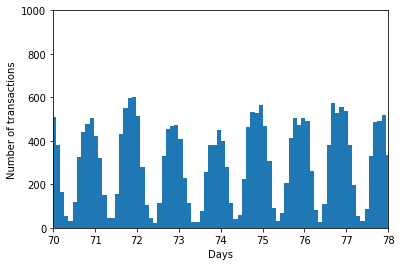

In [6]:
vals = plt.hist(train['TransactionDT'] / (3600*24), bins=1800)
plt.xlim(70, 78)
plt.xlabel('Days')
plt.ylabel('Number of transactions')
plt.ylim(0,1000)

可以看出交易是具有周期性的。

使用`make_day_feature`来构造特征，`offset`调整开始的时间。但是发现欺诈率与`day`相关性不高。

Text(0, 0.5, 'Fraction of fraudulent transactions')

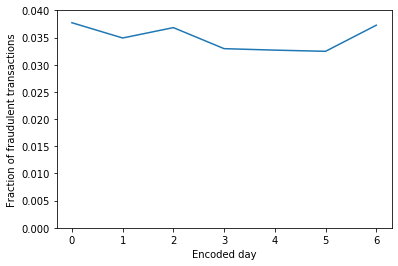

In [8]:

train['weekday'] = make_day_feature(train, offset=0.58)
plt.plot(train.groupby('weekday').mean()['isFraud'])

plt.ylim(0, 0.04)
plt.xlabel('Encoded day')
plt.ylabel('Fraction of fraudulent transactions')

Text(0, 0.5, 'Number of transactions')

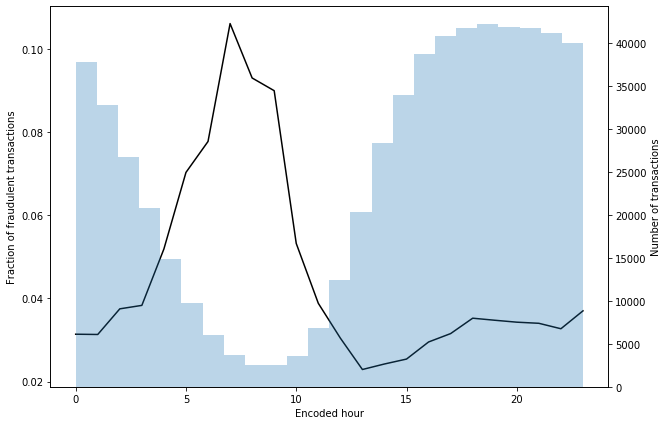

In [11]:
plt.figure(figsize=(10,7))
train['hours'] = make_hour_feature(train)
plt.plot(train.groupby('hours').mean()['isFraud'], color='k')
ax = plt.gca()  # 获得当前的Axes对象ax
ax2 = ax.twinx()
_ = ax2.hist(train['hours'], alpha=0.3, bins=24)
ax.set_xlabel('Encoded hour')
ax.set_ylabel('Fraction of fraudulent transactions')
ax2.set_ylabel('Number of transactions')

### Imputating `D9` with `hour`

The hour of the day is D9.

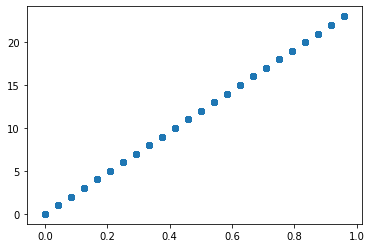

In [12]:
plt.scatter(train['D9'],train['hours'])

In [ ]:
START_DATE = datetime.datetime.strptime('2017-11-30', '%Y-%m-%d')

In [ ]:
for df in [train, test]:
    
    # Temporary variables for aggregation
    df['DT'] = df['TransactionDT'].apply(lambda x: (START_DATE + datetime.timedelta(seconds = x)))
    df['DT_M'] = ((df['DT'].dt.year-2017)*12 + df['DT'].dt.month).astype(np.int8)
    df['DT_W'] = ((df['DT'].dt.year-2017)*52 + df['DT'].dt.weekofyear).astype(np.int8)
    df['DT_D'] = ((df['DT'].dt.year-2017)*365 + df['DT'].dt.dayofyear).astype(np.int16)
    
    df['DT_hour'] = (df['DT'].dt.hour).astype(np.int8)
    df['DT_day_week'] = (df['DT'].dt.dayofweek).astype(np.int8)
    df['DT_day_month'] = (df['DT'].dt.day).astype(np.int8)
    df['DT_week_month'] = (df['DT'].dt.day)/7
    df['DT_week_month'] = df['DT_week_month'].apply(lambda x: math.ceil(x))

    # Possible solo feature
    df['is_december'] = df['DT'].dt.month
    df['is_december'] = (df['is_december']==12).astype(np.int8)

    # Holidays
    df['is_holiday'] = (df['DT'].dt.date.astype('datetime64').isin(us_holidays)).astype(np.int8)


## How the Magic Works

首先使用 `UID` 来定义同一用户；其次根据 `UID` 对特征进行聚合；最后删除 `UID` 列。假如有下面10列交易：

![](picture/table.png)

假如只用特征`FeatureX`，只能对70%的交易分对正确；假如用定义好的 `UID` 计算聚合特征（`FeatureX`的均值），可将所有交易分对正对【类似集成学习，弱学习器-->强学习器】。注意，这里我们并未使用 `UID` 作为特征。

## Feature Selection

- forward feature selection (using single or groups of features)：给定特征集合 ${a_1,a_2,…,a_n}$，首先选择一个最优的单特征子集（比如 ${a_2}$）作为第一轮选定集，然后在此基础上加入一个特征，构建包含两个特征的候选子集，选择最优的双特征子集作为第二轮选定子集，依次类推，直到找不到更优的特征子集才停止，这样逐渐增加相关特征的策略成为**前向（forward）搜索**；类似的，如果从完整的特征集合开始，每次尝试去掉一个无关特征，这样逐渐减少特征的策略称为**后向（backward）搜索**；前向后向搜索结合起来，每一轮逐渐增加选定相关特征（这些特征在后续轮中确定不会被去除），同时减少无关特征，这样的策略被称为**双向（bidirectional）搜索**
- recursive feature elimination (using single or groups of features)：通过学习器返回的 feature_importances_ 属性来获得每个特征的重要程度。 然后，从当前的特征集合中移除最不重要的特征。在特征集合上不断的重复递归这个步骤，直到最终达到所需要的特征数量为止。
- permutation importance：首先我们有一个已经训练好的模型以及该模型的预测表现（如RMSE），比如房价预测模型本来在validation数据上的RMSE是200。然后针对其中的变量（如面积），把这个变量的值全部打乱重新排序，用这个重新排序过的数据来做预测，得到一个预测表现。比如说这下RMSE变成了500，那么面积这个变量的重要性就可以记为500-200=300
- correlation analysis：好的特征子集所包含的特征应该是与分类的相关度较高
- time consistency: features found patterns in the present that exist in the future or not?
- client consistency：若样本1与样本2属于不同的分类，但在特征A、 B上的取值完全一样，那么特征子集{A，B}不应该选作最终的特征集。
- train/test distribution analysis

## Validation Strategy

不要相信单独一个validation，我们可以构造多个validation：使用前四个月训练，跳过一个月，预测最后一个月；前两个月训练，跳过2个月，预测最后一个月；第一个月训练，跳过三个月，预测最后一个月。

此外也使用CV，看模型对已知UID和未知UID预测效果：
- XGB model did best predicting known UIDs with AUC = 0.99723
- LGBM model did best predicting unknown UIDs with AUC = 0.92117
- CAT model did best predicting questionable UIDs with AUC = 0.98834

将三者集成的模型对所有类型都能获得最好的预测效果。

## Preventing Overfitting

为了防止过拟合，不能直接使用 UID，因为在测试集中有 60% 多的新用户。但是可以根据UID来提取特征：
```python
new_features = df.groupby('uid')[columns].agg(['mean'])
```
这样模型就有能力来识别未看过的用户。

## Post processing

对每个UID的预测值聚合求平均代替。

## Reference

- [1st Place Solution - Part 1](https://www.kaggle.com/c/ieee-fraud-detection/discussion/111284)
- [1st Place Solution - Part 2](https://www.kaggle.com/c/ieee-fraud-detection/discussion/111308)
- [EDA what's behind D features?](https://www.kaggle.com/akasyanama13/eda-what-s-behind-d-features)
- [How to Find UIDs](https://www.kaggle.com/c/ieee-fraud-detection/discussion/111510)
- [Adversarial Validation](https://www.qingtingip.com/h_236741.html)
- [How the Magic Works](https://www.kaggle.com/c/ieee-fraud-detection/discussion/111453)
- [IEEE - Data Minification Private](https://www.kaggle.com/kyakovlev/ieee-data-minification-private)
- [How all works together](https://www.kaggle.com/c/ieee-fraud-detection/discussion/107697#latest-644883)